## Задача 1. Минимизация гладкой функции

In [40]:
import scipy
import numpy as np
from matplotlib import pylab as plt

%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

1. Рассмотрим все ту же функцию из задания по линейной алгебре: ``f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)``, но теперь уже на промежутке [1, 30]

In [12]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

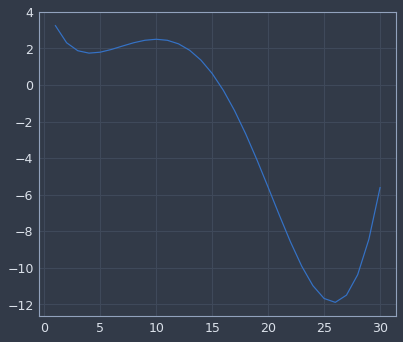

In [34]:
x = np.arange(1, 31)
y = np.array(f(x))

plt.plot(x, y)

4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")

5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 

In [14]:
scipy.optimize.minimize(f, 0)

      fun: 1.7452682903319903
 hess_inv: array([[6.02455355]])
      jac: array([-8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([4.13628824])

In [15]:
scipy.optimize.minimize(f, 10)

      fun: 1.7452682903428007
 hess_inv: array([[6.04868658]])
      jac: array([1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 3
     njev: 13
   status: 0
  success: True
        x: array([4.13630013])

In [16]:
scipy.optimize.minimize(f, 11)

      fun: -11.898894665981311
 hess_inv: array([[123.27588322]])
      jac: array([-1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 63
      nit: 2
     njev: 21
   status: 0
  success: True
        x: array([25.88019285])

с помощью функции ``scipy.optimize.minimize`` находим минимумы функции.

задав начальное приближение, где 0 <= x >= 10, мы попадаем в первый локальный минимум.

с ростом значений более 10 мы получаем значение 25.8, что соответствует глобальному минимуму на графике функции f.

6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [45]:
res_1 = scipy.optimize.minimize(f, 2, method='BFGS').fun
res_1 = np.round(res_1, 2)
res_1

1.75

7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [44]:
res_2 = scipy.optimize.minimize(f, 30, method='BFGS').fun
res_2 = np.round(res_2, 2)
res_2

-11.9

In [46]:
file = open('submission-1.txt', 'w')
file.write(f'{res_1} {res_2}')
file.close()

In [57]:
!cat submission-1.txt

1.75 -11.9

## Задача 2. Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

In [20]:
scipy.optimize.differential_evolution(f, bounds=[(1, 30)])

     fun: array([-11.89889467])
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019323])

In [48]:
res_3 = scipy.optimize.differential_evolution(f, bounds=[(1, 30)]).fun[0]
res_3 = np.round(res_3, 2)
res_3

-11.9

6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

Количество итерайций (nit) действительно сравнимо...

In [49]:
file = open('submission-2.txt', 'w')
file.write(f'{res_3}')
file.close()

In [56]:
!cat submission-2.txt

-11.9

## Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

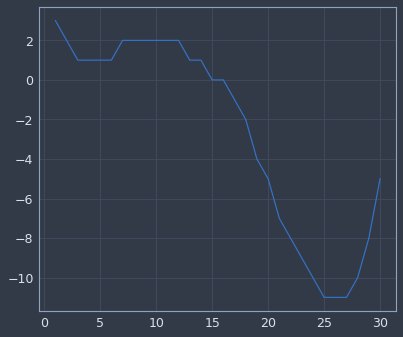

In [50]:
def h(x):
    return int(f(x))

# не разбирался почему h(x) выдает ошибку
# y = np.array(h(x))
# реализовал через map
y = np.array(list(map(h, x)))

plt.plot(x, y)

3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [71]:
res_4 = scipy.optimize.minimize(h, 30, method='BFGS').fun
res_4

-5

4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [72]:
res_5 = scipy.optimize.differential_evolution(h, bounds=[(1, 30)]).fun
res_5

-11.0

6. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

вероятно это связано с тем, что график функции в координате x=30 плоский,
а значит производная функции в этой точке равна 0
так как градиент ищет минимумы функции за счет правила: **в экстремумах функции производная равняется 0**, то попадает в первыый локальный минимум, который находит.
Не сложно предположить, что в случае данной негладкой функции, градиент метод оптимизации через градиент будет всегда находить результат, соответствующий заданому приближению

In [63]:
# глядя на график, можно сделать вывод
# что в приближении 10, результатом оптимизации по градиенту будет y=2
# а в приближении 5 -- y=1
example_1 = scipy.optimize.minimize(h, 10, method='BFGS').fun
example_2 = scipy.optimize.minimize(h, 5, method='BFGS').fun
example_1 == 2, example_2 == 1

(True, True)

In [64]:
# что мы и наблюдаем

In [73]:
file = open('submission-3.txt', 'w')
file.write(f'{res_4} {res_5}')
file.close()

In [74]:
!cat submission-3.txt

-5 -11.0